In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [16]:
df = pd.read_csv(filepath_or_buffer='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

In [17]:
df

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [20]:
df=df._get_numeric_data()

In [22]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [24]:
y_data = df['price']

In [26]:
x_data = df.drop(['price'],axis=1)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.10,random_state=1)

In [30]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [32]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)

In [34]:
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [36]:
lm = LinearRegression()

In [38]:
lm.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [40]:
lm.score(x_test[['horsepower']],y_test)

0.36358755750788263

In [42]:
lm.score(x_train[['horsepower']],y_train)

0.6619724197515104

In [44]:
lm.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [46]:
lm.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [48]:
Rcross = cross_val_score(lm,x_data[['horsepower']],y_data,cv=4)

In [50]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [52]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [58]:
-1*cross_val_score(lm,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

In [60]:
Rc = cross_val_score(lm,x_data[['horsepower']],y_data,cv=2)
Rc.mean()

0.5166761697127429

In [64]:
yhat= cross_val_predict(lm,x_data[['horsepower']],y_data,cv=4)
yhat[0:10]


array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284])

In [70]:
lm.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression()

In [78]:
yhat_train=lm.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:10]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244, 16095.58976762,  5493.39946597, 11664.79793006,
        6807.18648404, 16475.73097131])

In [96]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 7
    height = 7
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

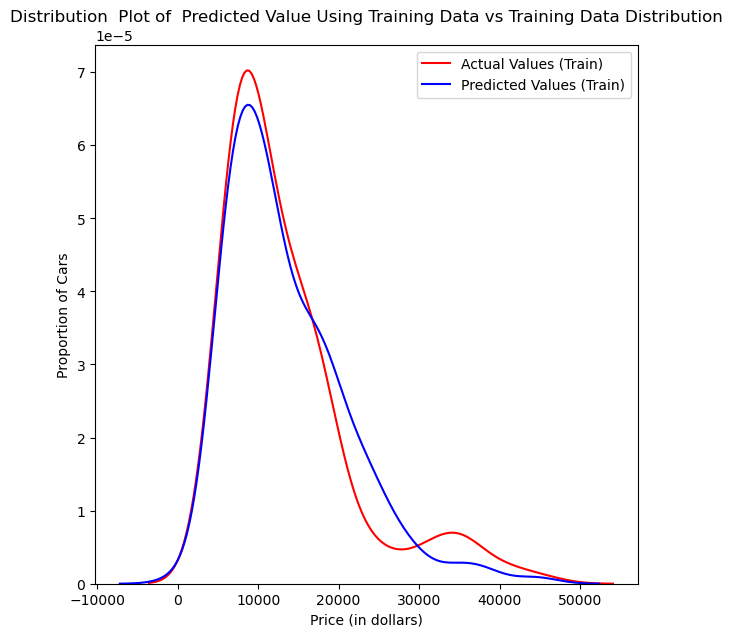

In [98]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [90]:
lm.fit(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)

LinearRegression()

In [92]:
yhat_test = lm.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:10]

array([ 9624.85531439,  6109.97977865, 11894.65790004,  5951.4654206 ,
       12585.04758398,  7600.85854464, 13650.87830483, 10581.09381059,
       14587.33046472,  5286.48811168])

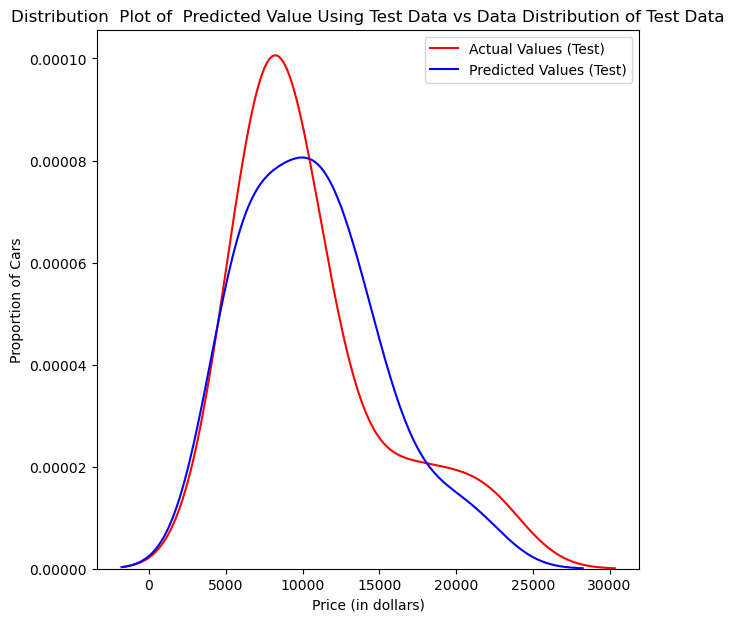

In [100]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [108]:
pr = PolynomialFeatures(degree=5)

In [112]:
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

In [116]:
lm.fit(x_train_pr,y_train)
lm.fit(x_test_pr,y_test)

LinearRegression()

In [120]:
yhat_test1= lm.predict(x_test_pr)
yhat_test1[0:10]

array([ 7881.63482707,  8240.27124281, 11562.86952021, 22752.30395752,
       23715.36972898,  9939.35961033, 14188.040403  ,  7115.75638171,
       16225.42903294,  7881.63482707])

In [144]:
print("Predicted values:", yhat_test1[0:4])
print("True values:", y_test[0:4].values)


Predicted values: [ 7881.63482707  8240.27124281 11562.86952021 22752.30395752]
True values: [ 6295. 10698. 13860. 13499.]


In [140]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()



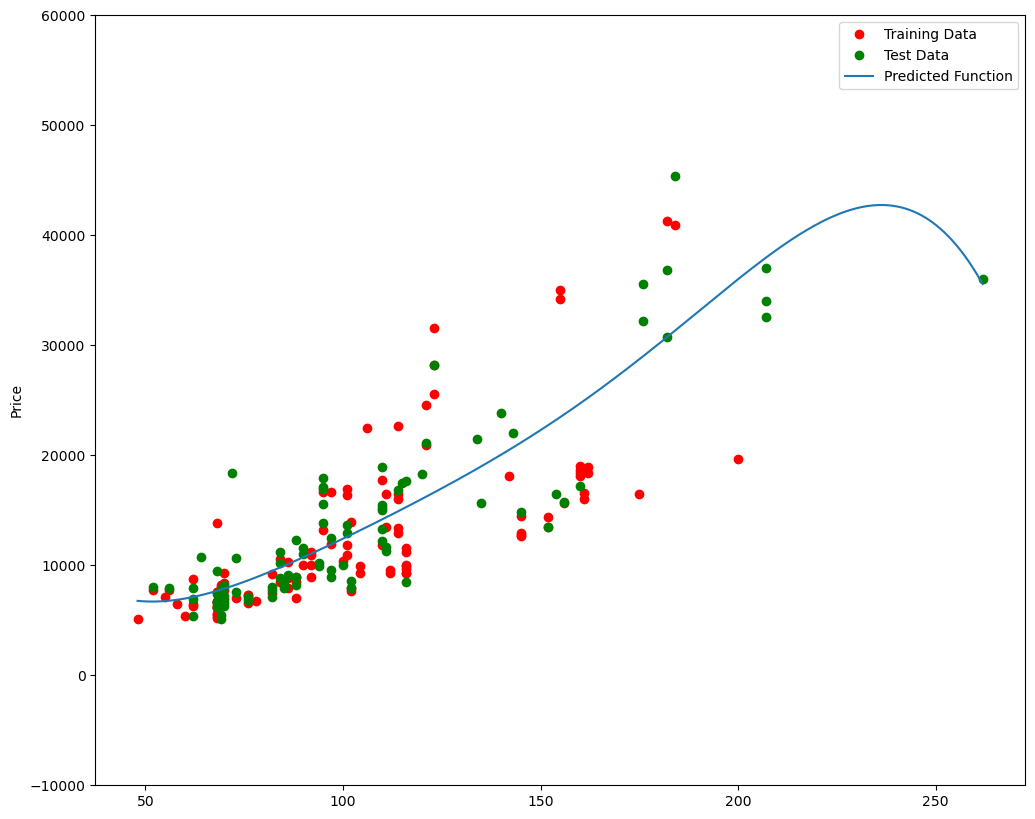

In [142]:
PollyPlot(x_train['horsepower'],x_test['horsepower'],y_train,y_test,lm,pr)

In [146]:
lm.score(x_test_pr,y_test)

0.8062314679949472

In [148]:
lm.score(x_train_pr,y_train)

0.4805559987701319

Text(3, 0.75, 'Maximum R^2 ')

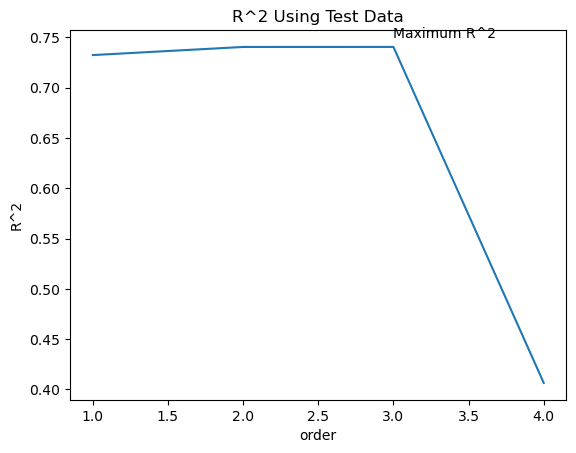

In [150]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [152]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [154]:
pr1 = PolynomialFeatures(degree=2)

In [158]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [166]:
lm.fit(x_train_pr1,y_train)

LinearRegression()

In [162]:
x_train_pr1.shape

(110, 15)

In [164]:
yhat_test_pr1 = lm.predict(x_test_pr1)
yhat_test_pr1[0:5]

array([ 6303.02917847, 10402.8714811 , 20516.3718561 , 19273.87340822,
       20555.5169455 ])

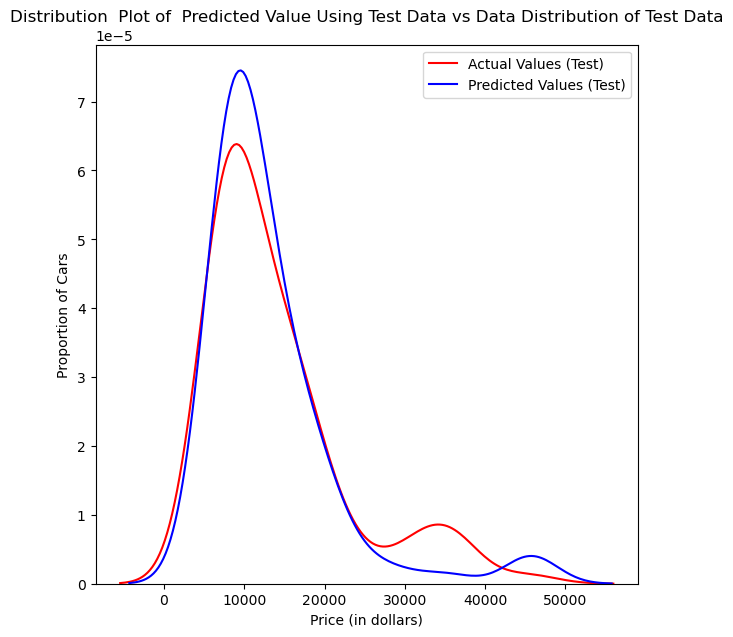

In [168]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test_pr1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [170]:
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

In [172]:
RidgeModel= Ridge(alpha=1)

In [174]:
RidgeModel.fit(x_train_pr1,y_train)

Ridge(alpha=1)

In [176]:
yhat2=RidgeModel.predict(x_test_pr1)
yhat2[0:8]

array([ 6338.06212743, 10446.45210348, 20632.91178776, 19299.64242617,
       20519.48548687,  8908.37296762, 10407.2590143 ,  6916.43015368])

In [180]:
print('predicted:', yhat2[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6338.06212743 10446.45210348 20632.91178776 19299.64242617]
test set : [ 6295. 10698. 13860. 13499.]


In [182]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:04<00:00, 217.69it/s, Test Score=0.711, Train Score=0.534]


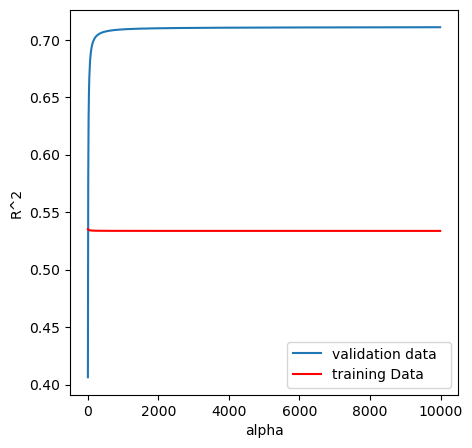

In [186]:
width = 5
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [190]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr1, y_train)
RigeModel.score(x_test_pr1, y_test)

0.612091566394774

In [192]:
#GRID SEARCH

In [194]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [196]:
RR= Ridge()
RR

Ridge()

In [198]:
Grid1 = GridSearchCV(RR,parameters1,cv=4)

In [200]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [204]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [206]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [208]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


Ridge(alpha=10000)